# Kuramoto-Sivashinsky analysis

In [2]:
import core
import util
import matplotlib.pylab as pylab
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
params = {
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
          }
pylab.rcParams.update(params)

tf.random.set_seed(0)
np.random.seed(0)

DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'

In [3]:
train_x_list, train_t_list, train_u_mat = util.load_ks_data("data/ks_train.mat")
test_x_list, test_t_list, test_u_mat = util.load_ks_data("data/ks_test.mat")

# Train u(x,t) viz

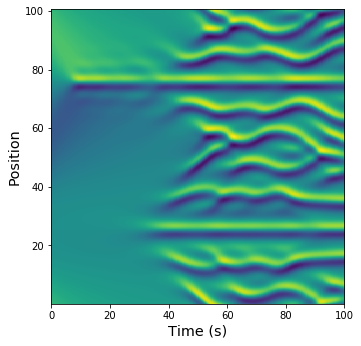

In [6]:
fig = util.plot_u(train_x_list, train_t_list, train_u_mat)
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'ks_train.png', format='png', dpi=DPI)

# Test u(x,t) viz

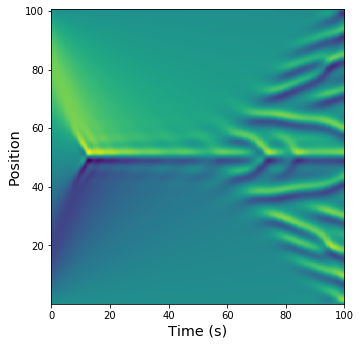

In [7]:
fig = util.plot_u(test_x_list, test_t_list, test_u_mat)
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'ks_test.png', format='png', dpi=DPI)

# Training

In [21]:
train_input, train_output = core.u_mat_to_regression(train_u_mat)

def build_model(N, num_space):
  model = tf.keras.Sequential()
  # Input = (num_space,) = U(x, t)
  model.add(layers.Dense(N, activation='sigmoid', input_shape=(num_space,)))
  model.add(layers.Dense(N, activation='sigmoid'))
  model.add(layers.Dense(N, activation='sigmoid'))
  # Output = (numspace,) = U(x, t + dt)
  model.add(layers.Dense(num_space))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss='mse',
                metrics=['mse'])
  return model

# Cross validate

In [16]:
for N in [10, 100, 500, 1000]:
  num_space = train_u_mat.shape[0]
  model = build_model(N, num_space)
  mse = core.get_kfold_mse(model, train_input, train_output)
  print(f"N= {N}, kfold mse = {mse}")

Train on 166 samples
Epoch 1/100
166/166 [==============================] - 0s 2ms/sample - loss: 1.2967 - mse: 1.2967
Epoch 2/100
166/166 [==============================] - 0s 310us/sample - loss: 1.8791 - mse: 1.8791
Epoch 3/100
166/166 [==============================] - 0s 245us/sample - loss: 0.8229 - mse: 0.8229
Epoch 4/100
166/166 [==============================] - 0s 264us/sample - loss: 0.8858 - mse: 0.8858
Epoch 5/100
166/166 [==============================] - 0s 322us/sample - loss: 0.9045 - mse: 0.9045
Epoch 6/100
166/166 [==============================] - 0s 294us/sample - loss: 0.9069 - mse: 0.9069
Epoch 7/100
166/166 [==============================] - 0s 256us/sample - loss: 0.8674 - mse: 0.8674
Epoch 8/100
166/166 [==============================] - 0s 345us/sample - loss: 0.8127 - mse: 0.8127
Epoch 9/100
166/166 [==============================] - 0s 259us/sample - loss: 0.7761 - mse: 0.7761
Epoch 10/100
166/166 [==============================] - 0s 298us/sample - loss: 0

166/166 [==============================] - 0s 332us/sample - loss: 0.3591 - mse: 0.3591
Epoch 83/100
166/166 [==============================] - 0s 334us/sample - loss: 0.3563 - mse: 0.3563
Epoch 84/100
166/166 [==============================] - 0s 292us/sample - loss: 0.3539 - mse: 0.3539
Epoch 85/100
166/166 [==============================] - 0s 229us/sample - loss: 0.3511 - mse: 0.3511
Epoch 86/100
166/166 [==============================] - 0s 268us/sample - loss: 0.3484 - mse: 0.3484
Epoch 87/100
166/166 [==============================] - 0s 201us/sample - loss: 0.3460 - mse: 0.3460
Epoch 88/100
166/166 [==============================] - 0s 270us/sample - loss: 0.3434 - mse: 0.3434
Epoch 89/100
166/166 [==============================] - 0s 299us/sample - loss: 0.3409 - mse: 0.3409
Epoch 90/100
166/166 [==============================] - 0s 277us/sample - loss: 0.3384 - mse: 0.3384
Epoch 91/100
166/166 [==============================] - 0s 212us/sample - loss: 0.3359 - mse: 0.3359
Epo

Epoch 63/100
167/167 [==============================] - 0s 250us/sample - loss: 0.1879 - mse: 0.1879
Epoch 64/100
167/167 [==============================] - 0s 483us/sample - loss: 0.1859 - mse: 0.1859
Epoch 65/100
167/167 [==============================] - 0s 451us/sample - loss: 0.1837 - mse: 0.1837
Epoch 66/100
167/167 [==============================] - 0s 329us/sample - loss: 0.1821 - mse: 0.1821
Epoch 67/100
167/167 [==============================] - 0s 466us/sample - loss: 0.1814 - mse: 0.1814
Epoch 68/100
167/167 [==============================] - 0s 277us/sample - loss: 0.1795 - mse: 0.1795
Epoch 69/100
167/167 [==============================] - 0s 490us/sample - loss: 0.1782 - mse: 0.1782
Epoch 70/100
167/167 [==============================] - 0s 582us/sample - loss: 0.1772 - mse: 0.1772
Epoch 71/100
167/167 [==============================] - 0s 427us/sample - loss: 0.1763 - mse: 0.1763
Epoch 72/100
167/167 [==============================] - 0s 498us/sample - loss: 0.1760 - ms

Epoch 44/100
167/167 [==============================] - 0s 270us/sample - loss: 0.0816 - mse: 0.0816
Epoch 45/100
167/167 [==============================] - 0s 281us/sample - loss: 0.0809 - mse: 0.0809
Epoch 46/100
167/167 [==============================] - 0s 248us/sample - loss: 0.0802 - mse: 0.0802
Epoch 47/100
167/167 [==============================] - 0s 285us/sample - loss: 0.0795 - mse: 0.0795
Epoch 48/100
167/167 [==============================] - 0s 283us/sample - loss: 0.0788 - mse: 0.0788
Epoch 49/100
167/167 [==============================] - 0s 255us/sample - loss: 0.0781 - mse: 0.0781
Epoch 50/100
167/167 [==============================] - 0s 288us/sample - loss: 0.0775 - mse: 0.0775
Epoch 51/100
167/167 [==============================] - 0s 292us/sample - loss: 0.0770 - mse: 0.0770
Epoch 52/100
167/167 [==============================] - 0s 259us/sample - loss: 0.0768 - mse: 0.0768
Epoch 53/100
167/167 [==============================] - 0s 253us/sample - loss: 0.0764 - ms

Epoch 24/100
166/166 [==============================] - 0s 319us/sample - loss: 0.5860 - mse: 0.5860
Epoch 25/100
166/166 [==============================] - 0s 345us/sample - loss: 0.5785 - mse: 0.5785
Epoch 26/100
166/166 [==============================] - 0s 285us/sample - loss: 0.5710 - mse: 0.5710
Epoch 27/100
166/166 [==============================] - 0s 559us/sample - loss: 0.5635 - mse: 0.5635
Epoch 28/100
166/166 [==============================] - 0s 401us/sample - loss: 0.5567 - mse: 0.5567
Epoch 29/100
166/166 [==============================] - 0s 395us/sample - loss: 0.5498 - mse: 0.5498
Epoch 30/100
166/166 [==============================] - 0s 445us/sample - loss: 0.5431 - mse: 0.5431
Epoch 31/100
166/166 [==============================] - 0s 363us/sample - loss: 0.5367 - mse: 0.5367
Epoch 32/100
166/166 [==============================] - 0s 712us/sample - loss: 0.5304 - mse: 0.5304
Epoch 33/100
166/166 [==============================] - 0s 518us/sample - loss: 0.5246 - ms

Epoch 5/100
167/167 [==============================] - 0s 316us/sample - loss: 0.2830 - mse: 0.2830
Epoch 6/100
167/167 [==============================] - 0s 257us/sample - loss: 0.2779 - mse: 0.2779
Epoch 7/100
167/167 [==============================] - 0s 307us/sample - loss: 0.2749 - mse: 0.2749
Epoch 8/100
167/167 [==============================] - 0s 222us/sample - loss: 0.2702 - mse: 0.2702
Epoch 9/100
167/167 [==============================] - 0s 310us/sample - loss: 0.2658 - mse: 0.2658
Epoch 10/100
167/167 [==============================] - 0s 256us/sample - loss: 0.2611 - mse: 0.2611
Epoch 11/100
167/167 [==============================] - 0s 202us/sample - loss: 0.2571 - mse: 0.2571
Epoch 12/100
167/167 [==============================] - 0s 323us/sample - loss: 0.2529 - mse: 0.2529
Epoch 13/100
167/167 [==============================] - 0s 306us/sample - loss: 0.2489 - mse: 0.2489
Epoch 14/100
167/167 [==============================] - 0s 475us/sample - loss: 0.2444 - mse: 0.

Epoch 87/100
167/167 [==============================] - 0s 186us/sample - loss: 0.1088 - mse: 0.1088
Epoch 88/100
167/167 [==============================] - 0s 280us/sample - loss: 0.1080 - mse: 0.1080
Epoch 89/100
167/167 [==============================] - 0s 333us/sample - loss: 0.1060 - mse: 0.1060
Epoch 90/100
167/167 [==============================] - 0s 275us/sample - loss: 0.1050 - mse: 0.1050
Epoch 91/100
167/167 [==============================] - 0s 346us/sample - loss: 0.1039 - mse: 0.1039
Epoch 92/100
167/167 [==============================] - 0s 332us/sample - loss: 0.1025 - mse: 0.1025
Epoch 93/100
167/167 [==============================] - 0s 379us/sample - loss: 0.1013 - mse: 0.1013
Epoch 94/100
167/167 [==============================] - 0s 462us/sample - loss: 0.1004 - mse: 0.1004
Epoch 95/100
167/167 [==============================] - 0s 359us/sample - loss: 0.0991 - mse: 0.0991
Epoch 96/100
167/167 [==============================] - 0s 256us/sample - loss: 0.0980 - ms

Epoch 68/100
167/167 [==============================] - 0s 347us/sample - loss: 0.0522 - mse: 0.0522
Epoch 69/100
167/167 [==============================] - 0s 281us/sample - loss: 0.0517 - mse: 0.0517
Epoch 70/100
167/167 [==============================] - 0s 305us/sample - loss: 0.0512 - mse: 0.0512
Epoch 71/100
167/167 [==============================] - 0s 275us/sample - loss: 0.0508 - mse: 0.0508
Epoch 72/100
167/167 [==============================] - 0s 398us/sample - loss: 0.0502 - mse: 0.0502
Epoch 73/100
167/167 [==============================] - 0s 502us/sample - loss: 0.0499 - mse: 0.0499
Epoch 74/100
167/167 [==============================] - 0s 461us/sample - loss: 0.0493 - mse: 0.0493
Epoch 75/100
167/167 [==============================] - 0s 453us/sample - loss: 0.0490 - mse: 0.0490
Epoch 76/100
167/167 [==============================] - 0s 321us/sample - loss: 0.0485 - mse: 0.0485
Epoch 77/100
167/167 [==============================] - 0s 205us/sample - loss: 0.0480 - ms

Epoch 48/100
166/166 [==============================] - 0s 364us/sample - loss: 0.4546 - mse: 0.4546
Epoch 49/100
166/166 [==============================] - 0s 270us/sample - loss: 0.4503 - mse: 0.4503
Epoch 50/100
166/166 [==============================] - 0s 292us/sample - loss: 0.4460 - mse: 0.4460
Epoch 51/100
166/166 [==============================] - 0s 296us/sample - loss: 0.4415 - mse: 0.4415
Epoch 52/100
166/166 [==============================] - 0s 242us/sample - loss: 0.4371 - mse: 0.4371
Epoch 53/100
166/166 [==============================] - 0s 326us/sample - loss: 0.4328 - mse: 0.4328
Epoch 54/100
166/166 [==============================] - 0s 219us/sample - loss: 0.4284 - mse: 0.4284
Epoch 55/100
166/166 [==============================] - 0s 244us/sample - loss: 0.4243 - mse: 0.4243
Epoch 56/100
166/166 [==============================] - 0s 294us/sample - loss: 0.4203 - mse: 0.4203
Epoch 57/100
166/166 [==============================] - 0s 245us/sample - loss: 0.4160 - ms

Epoch 29/100
167/167 [==============================] - 0s 213us/sample - loss: 0.1802 - mse: 0.1802
Epoch 30/100
167/167 [==============================] - 0s 196us/sample - loss: 0.1782 - mse: 0.1782
Epoch 31/100
167/167 [==============================] - 0s 225us/sample - loss: 0.1760 - mse: 0.1760
Epoch 32/100
167/167 [==============================] - 0s 266us/sample - loss: 0.1750 - mse: 0.1750
Epoch 33/100
167/167 [==============================] - 0s 359us/sample - loss: 0.1729 - mse: 0.1729
Epoch 34/100
167/167 [==============================] - 0s 265us/sample - loss: 0.1710 - mse: 0.1710
Epoch 35/100
167/167 [==============================] - 0s 285us/sample - loss: 0.1689 - mse: 0.1689
Epoch 36/100
167/167 [==============================] - 0s 223us/sample - loss: 0.1677 - mse: 0.1677
Epoch 37/100
167/167 [==============================] - 0s 188us/sample - loss: 0.1650 - mse: 0.1650
Epoch 38/100
167/167 [==============================] - 0s 184us/sample - loss: 0.1636 - ms

Epoch 10/100
167/167 [==============================] - 0s 329us/sample - loss: 0.0880 - mse: 0.0880
Epoch 11/100
167/167 [==============================] - 0s 215us/sample - loss: 0.0872 - mse: 0.0872
Epoch 12/100
167/167 [==============================] - 0s 222us/sample - loss: 0.0866 - mse: 0.0866
Epoch 13/100
167/167 [==============================] - 0s 275us/sample - loss: 0.0859 - mse: 0.0859
Epoch 14/100
167/167 [==============================] - 0s 257us/sample - loss: 0.0851 - mse: 0.0851
Epoch 15/100
167/167 [==============================] - 0s 235us/sample - loss: 0.0842 - mse: 0.0842
Epoch 16/100
167/167 [==============================] - 0s 244us/sample - loss: 0.0830 - mse: 0.0830
Epoch 17/100
167/167 [==============================] - 0s 316us/sample - loss: 0.0819 - mse: 0.0819
Epoch 18/100
167/167 [==============================] - 0s 280us/sample - loss: 0.0812 - mse: 0.0812
Epoch 19/100
167/167 [==============================] - 0s 392us/sample - loss: 0.0805 - ms

167/167 [==============================] - 0s 436us/sample - loss: 0.0433 - mse: 0.0433
Epoch 92/100
167/167 [==============================] - 0s 287us/sample - loss: 0.0432 - mse: 0.0432
Epoch 93/100
167/167 [==============================] - 0s 273us/sample - loss: 0.0429 - mse: 0.0429
Epoch 94/100
167/167 [==============================] - 0s 438us/sample - loss: 0.0425 - mse: 0.0425
Epoch 95/100
167/167 [==============================] - 0s 357us/sample - loss: 0.0428 - mse: 0.0428
Epoch 96/100
167/167 [==============================] - 0s 336us/sample - loss: 0.0421 - mse: 0.0421
Epoch 97/100
167/167 [==============================] - 0s 262us/sample - loss: 0.0413 - mse: 0.0413
Epoch 98/100
167/167 [==============================] - 0s 334us/sample - loss: 0.0421 - mse: 0.0421
Epoch 99/100
167/167 [==============================] - 0s 324us/sample - loss: 0.0403 - mse: 0.0403
Epoch 100/100
83/83 [==============================] - 0s 555us/sample - loss: 0.0574 - mse: 0.0574
N= 5

Epoch 71/100
166/166 [==============================] - 0s 275us/sample - loss: 0.3852 - mse: 0.3852
Epoch 72/100
166/166 [==============================] - 0s 374us/sample - loss: 0.3816 - mse: 0.3816
Epoch 73/100
166/166 [==============================] - 0s 282us/sample - loss: 0.3784 - mse: 0.3784
Epoch 74/100
166/166 [==============================] - 0s 229us/sample - loss: 0.3755 - mse: 0.3755
Epoch 75/100
166/166 [==============================] - 0s 281us/sample - loss: 0.3721 - mse: 0.3721
Epoch 76/100
166/166 [==============================] - 0s 279us/sample - loss: 0.3691 - mse: 0.3691
Epoch 77/100
166/166 [==============================] - 0s 563us/sample - loss: 0.3663 - mse: 0.3663
Epoch 78/100
166/166 [==============================] - 0s 350us/sample - loss: 0.3632 - mse: 0.3632
Epoch 79/100
166/166 [==============================] - 0s 323us/sample - loss: 0.3602 - mse: 0.3602
Epoch 80/100
166/166 [==============================] - 0s 366us/sample - loss: 0.3575 - ms

Epoch 52/100
167/167 [==============================] - 0s 268us/sample - loss: 0.1844 - mse: 0.1844
Epoch 53/100
167/167 [==============================] - 0s 242us/sample - loss: 0.1835 - mse: 0.1835
Epoch 54/100
167/167 [==============================] - 0s 269us/sample - loss: 0.1819 - mse: 0.1819
Epoch 55/100
167/167 [==============================] - 0s 249us/sample - loss: 0.1799 - mse: 0.1799
Epoch 56/100
167/167 [==============================] - 0s 256us/sample - loss: 0.1790 - mse: 0.1790
Epoch 57/100
167/167 [==============================] - 0s 234us/sample - loss: 0.1789 - mse: 0.1789
Epoch 58/100
167/167 [==============================] - 0s 277us/sample - loss: 0.1773 - mse: 0.1773
Epoch 59/100
167/167 [==============================] - 0s 230us/sample - loss: 0.1740 - mse: 0.1740
Epoch 60/100
167/167 [==============================] - 0s 227us/sample - loss: 0.1731 - mse: 0.1731
Epoch 61/100
167/167 [==============================] - 0s 198us/sample - loss: 0.1708 - ms

Epoch 33/100
167/167 [==============================] - 0s 230us/sample - loss: 0.0843 - mse: 0.0843
Epoch 34/100
167/167 [==============================] - 0s 370us/sample - loss: 0.0837 - mse: 0.0837
Epoch 35/100
167/167 [==============================] - 0s 348us/sample - loss: 0.0830 - mse: 0.0830
Epoch 36/100
167/167 [==============================] - 0s 386us/sample - loss: 0.0824 - mse: 0.0824
Epoch 37/100
167/167 [==============================] - 0s 323us/sample - loss: 0.0818 - mse: 0.0818
Epoch 38/100
167/167 [==============================] - 0s 422us/sample - loss: 0.0811 - mse: 0.0811
Epoch 39/100
167/167 [==============================] - 0s 393us/sample - loss: 0.0802 - mse: 0.0802
Epoch 40/100
167/167 [==============================] - 0s 373us/sample - loss: 0.0794 - mse: 0.0794
Epoch 41/100
167/167 [==============================] - 0s 362us/sample - loss: 0.0787 - mse: 0.0787
Epoch 42/100
167/167 [==============================] - 0s 479us/sample - loss: 0.0781 - ms

# Training prediction given initial condition

In [22]:
best_N = 500
num_space = test_u_mat.shape[0]
best_model = build_model(best_N, num_space)
best_model.fit(train_input, train_output, epochs=1000, batch_size=32, shuffle=True)

Train on 250 samples
Epoch 1/1000
250/250 [==============================] - 0s 2ms/sample - loss: 0.9345 - mse: 0.9345
Epoch 2/1000
250/250 [==============================] - 0s 701us/sample - loss: 0.7557 - mse: 0.7557
Epoch 3/1000
250/250 [==============================] - 0s 752us/sample - loss: 0.6809 - mse: 0.6809
Epoch 4/1000
250/250 [==============================] - 0s 645us/sample - loss: 0.5947 - mse: 0.5947
Epoch 5/1000
250/250 [==============================] - 0s 729us/sample - loss: 0.5142 - mse: 0.5142
Epoch 6/1000
250/250 [==============================] - 0s 566us/sample - loss: 0.4495 - mse: 0.4495
Epoch 7/1000
250/250 [==============================] - 0s 522us/sample - loss: 0.3949 - mse: 0.3949
Epoch 8/1000
250/250 [==============================] - 0s 550us/sample - loss: 0.3456 - mse: 0.3456
Epoch 9/1000
250/250 [==============================] - 0s 764us/sample - loss: 0.2963 - mse: 0.2963
Epoch 10/1000
250/250 [==============================] - 0s 672us/sample

250/250 [==============================] - 0s 720us/sample - loss: 7.2629e-04 - mse: 7.2629e-04
Epoch 159/1000
250/250 [==============================] - 0s 511us/sample - loss: 8.2098e-04 - mse: 8.2098e-04
Epoch 160/1000
250/250 [==============================] - 0s 427us/sample - loss: 7.0603e-04 - mse: 7.0603e-04
Epoch 161/1000
250/250 [==============================] - 0s 425us/sample - loss: 7.4145e-04 - mse: 7.4145e-04
Epoch 162/1000
250/250 [==============================] - 0s 443us/sample - loss: 7.8037e-04 - mse: 7.8037e-04
Epoch 163/1000
250/250 [==============================] - 0s 449us/sample - loss: 7.2433e-04 - mse: 7.2433e-04
Epoch 164/1000
250/250 [==============================] - 0s 460us/sample - loss: 7.5072e-04 - mse: 7.5072e-04
Epoch 165/1000
250/250 [==============================] - 0s 458us/sample - loss: 6.9292e-04 - mse: 6.9292e-04
Epoch 166/1000
250/250 [==============================] - 0s 468us/sample - loss: 6.8076e-04 - mse: 6.8076e-04
Epoch 167/1000
2

250/250 [==============================] - 0s 1ms/sample - loss: 6.2192e-04 - mse: 6.2192e-04
Epoch 307/1000
250/250 [==============================] - 1s 4ms/sample - loss: 5.4992e-04 - mse: 5.4992e-04
Epoch 308/1000
250/250 [==============================] - 1s 5ms/sample - loss: 5.6547e-04 - mse: 5.6547e-04
Epoch 309/1000
250/250 [==============================] - 1s 5ms/sample - loss: 5.5698e-04 - mse: 5.5698e-04
Epoch 310/1000
250/250 [==============================] - 1s 6ms/sample - loss: 5.4940e-04 - mse: 5.4940e-04
Epoch 311/1000
250/250 [==============================] - 1s 4ms/sample - loss: 4.7155e-04 - mse: 4.7155e-04
Epoch 312/1000
250/250 [==============================] - 1s 5ms/sample - loss: 5.2633e-04 - mse: 5.2633e-04
Epoch 313/1000
250/250 [==============================] - 0s 512us/sample - loss: 7.2304e-04 - mse: 7.2304e-04
Epoch 314/1000
250/250 [==============================] - 0s 409us/sample - loss: 5.9019e-04 - mse: 5.9019e-04
Epoch 315/1000
250/250 [======

250/250 [==============================] - 0s 506us/sample - loss: 6.0430e-04 - mse: 6.0430e-04
Epoch 381/1000
250/250 [==============================] - 0s 478us/sample - loss: 6.0865e-04 - mse: 6.0865e-04
Epoch 382/1000
250/250 [==============================] - 0s 465us/sample - loss: 7.4174e-04 - mse: 7.4174e-04
Epoch 383/1000
250/250 [==============================] - 0s 528us/sample - loss: 8.2261e-04 - mse: 8.2261e-04
Epoch 384/1000
250/250 [==============================] - 0s 488us/sample - loss: 0.0013 - mse: 0.0013
Epoch 385/1000
250/250 [==============================] - 0s 595us/sample - loss: 0.0014 - mse: 0.0014
Epoch 386/1000
250/250 [==============================] - 0s 544us/sample - loss: 0.0015 - mse: 0.0015
Epoch 387/1000
250/250 [==============================] - 0s 517us/sample - loss: 0.0013 - mse: 0.0013
Epoch 388/1000
250/250 [==============================] - 0s 489us/sample - loss: 0.0013 - mse: 0.0013
Epoch 389/1000
250/250 [==============================] 

250/250 [==============================] - 0s 651us/sample - loss: 4.5450e-04 - mse: 4.5450e-04
Epoch 531/1000
250/250 [==============================] - 0s 517us/sample - loss: 3.3323e-04 - mse: 3.3323e-04
Epoch 532/1000
250/250 [==============================] - 0s 675us/sample - loss: 2.8088e-04 - mse: 2.8088e-04
Epoch 533/1000
250/250 [==============================] - 0s 623us/sample - loss: 2.8128e-04 - mse: 2.8128e-04
Epoch 534/1000
250/250 [==============================] - 0s 661us/sample - loss: 2.5481e-04 - mse: 2.5481e-04
Epoch 535/1000
250/250 [==============================] - 0s 789us/sample - loss: 2.8826e-04 - mse: 2.8826e-04
Epoch 536/1000
250/250 [==============================] - 0s 926us/sample - loss: 2.7271e-04 - mse: 2.7271e-04
Epoch 537/1000
250/250 [==============================] - 0s 781us/sample - loss: 2.1154e-04 - mse: 2.1154e-04
Epoch 538/1000
250/250 [==============================] - 0s 723us/sample - loss: 2.0500e-04 - mse: 2.0500e-04
Epoch 539/1000
2

250/250 [==============================] - 0s 558us/sample - loss: 2.1518e-04 - mse: 2.1518e-04
Epoch 605/1000
250/250 [==============================] - 0s 383us/sample - loss: 2.3707e-04 - mse: 2.3707e-04
Epoch 606/1000
250/250 [==============================] - 0s 390us/sample - loss: 2.4475e-04 - mse: 2.4475e-04
Epoch 607/1000
250/250 [==============================] - 0s 531us/sample - loss: 2.4549e-04 - mse: 2.4549e-04
Epoch 608/1000
250/250 [==============================] - 0s 508us/sample - loss: 2.4097e-04 - mse: 2.4097e-04
Epoch 609/1000
250/250 [==============================] - 0s 376us/sample - loss: 2.4076e-04 - mse: 2.4076e-04
Epoch 610/1000
250/250 [==============================] - 0s 369us/sample - loss: 2.7964e-04 - mse: 2.7964e-04
Epoch 611/1000
250/250 [==============================] - 0s 387us/sample - loss: 3.1684e-04 - mse: 3.1684e-04
Epoch 612/1000
250/250 [==============================] - 0s 405us/sample - loss: 4.1309e-04 - mse: 4.1309e-04
Epoch 613/1000
2

250/250 [==============================] - 0s 501us/sample - loss: 3.7273e-04 - mse: 3.7273e-04
Epoch 753/1000
250/250 [==============================] - 0s 453us/sample - loss: 4.3459e-04 - mse: 4.3459e-04
Epoch 754/1000
250/250 [==============================] - 0s 456us/sample - loss: 4.0780e-04 - mse: 4.0780e-04
Epoch 755/1000
250/250 [==============================] - 0s 513us/sample - loss: 4.3091e-04 - mse: 4.3091e-04
Epoch 756/1000
250/250 [==============================] - 0s 523us/sample - loss: 5.8184e-04 - mse: 5.8184e-04
Epoch 757/1000
250/250 [==============================] - 0s 684us/sample - loss: 5.3683e-04 - mse: 5.3683e-04
Epoch 758/1000
250/250 [==============================] - 0s 512us/sample - loss: 5.9290e-04 - mse: 5.9290e-04
Epoch 759/1000
250/250 [==============================] - 0s 515us/sample - loss: 7.2610e-04 - mse: 7.2610e-04
Epoch 760/1000
250/250 [==============================] - 0s 662us/sample - loss: 8.9785e-04 - mse: 8.9785e-04
Epoch 761/1000
2

250/250 [==============================] - 0s 634us/sample - loss: 8.5248e-05 - mse: 8.5248e-05
Epoch 828/1000
250/250 [==============================] - 0s 560us/sample - loss: 8.2084e-05 - mse: 8.2084e-05
Epoch 829/1000
250/250 [==============================] - 0s 708us/sample - loss: 7.7295e-05 - mse: 7.7295e-05
Epoch 830/1000
250/250 [==============================] - 0s 585us/sample - loss: 8.9433e-05 - mse: 8.9433e-05
Epoch 831/1000
250/250 [==============================] - 0s 558us/sample - loss: 8.2522e-05 - mse: 8.2522e-05
Epoch 832/1000
250/250 [==============================] - 0s 493us/sample - loss: 9.8162e-05 - mse: 9.8162e-05
Epoch 833/1000
250/250 [==============================] - 0s 681us/sample - loss: 1.0119e-04 - mse: 1.0119e-04
Epoch 834/1000
250/250 [==============================] - 0s 480us/sample - loss: 9.0349e-05 - mse: 9.0349e-05
Epoch 835/1000
250/250 [==============================] - 0s 739us/sample - loss: 7.3091e-05 - mse: 7.3091e-05
Epoch 836/1000
2

Epoch 903/1000
250/250 [==============================] - 0s 549us/sample - loss: 5.2873e-04 - mse: 5.2873e-04
Epoch 904/1000
250/250 [==============================] - 0s 467us/sample - loss: 3.8588e-04 - mse: 3.8588e-04
Epoch 905/1000
250/250 [==============================] - 0s 460us/sample - loss: 3.9905e-04 - mse: 3.9905e-04
Epoch 906/1000
250/250 [==============================] - 0s 459us/sample - loss: 3.3258e-04 - mse: 3.3258e-04
Epoch 907/1000
250/250 [==============================] - 0s 613us/sample - loss: 2.5682e-04 - mse: 2.5682e-04
Epoch 908/1000
250/250 [==============================] - 0s 468us/sample - loss: 2.1438e-04 - mse: 2.1438e-04
Epoch 909/1000
250/250 [==============================] - 0s 503us/sample - loss: 1.7448e-04 - mse: 1.7448e-04
Epoch 910/1000
250/250 [==============================] - 0s 569us/sample - loss: 1.4293e-04 - mse: 1.4293e-04
Epoch 911/1000
250/250 [==============================] - 0s 490us/sample - loss: 1.2316e-04 - mse: 1.2316e-04
E

Epoch 977/1000
250/250 [==============================] - 0s 790us/sample - loss: 3.0396e-05 - mse: 3.0396e-05
Epoch 978/1000
250/250 [==============================] - 0s 475us/sample - loss: 2.9979e-05 - mse: 2.9979e-05
Epoch 979/1000
250/250 [==============================] - 0s 489us/sample - loss: 3.1721e-05 - mse: 3.1721e-05
Epoch 980/1000
250/250 [==============================] - 0s 456us/sample - loss: 3.1271e-05 - mse: 3.1271e-05
Epoch 981/1000
250/250 [==============================] - 0s 527us/sample - loss: 2.9178e-05 - mse: 2.9178e-05
Epoch 982/1000
250/250 [==============================] - 0s 592us/sample - loss: 2.9303e-05 - mse: 2.9303e-05
Epoch 983/1000
250/250 [==============================] - 0s 601us/sample - loss: 2.6142e-05 - mse: 2.6142e-05
Epoch 984/1000
250/250 [==============================] - 0s 444us/sample - loss: 2.9236e-05 - mse: 2.9236e-05
Epoch 985/1000
250/250 [==============================] - 0s 609us/sample - loss: 2.7345e-05 - mse: 2.7345e-05
E

In [23]:
# A vector of length num_space. Set to initial condition first.
ut = train_u_mat[:,0:1]
num_time = train_u_mat.shape[1]
train_pred_u = core.create_pred_u_mat(ut, best_model, num_time)

t = 10
t = 20
t = 30
t = 40
t = 50
t = 60
t = 70
t = 80
t = 90
t = 100
t = 110
t = 120
t = 130
t = 140
t = 150
t = 160
t = 170
t = 180
t = 190
t = 200
t = 210
t = 220
t = 230
t = 240
t = 250
NN prediction of u(x,t) takes 11.066874742507935 s


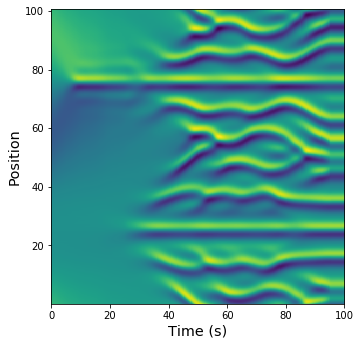

In [27]:
fig = util.plot_u(train_x_list, train_t_list, train_pred_u)
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'ks_train_pred.png', format='png', dpi=DPI)

# Testing given initial condition

In [25]:
ut = test_u_mat[:,0:1]
num_time = test_u_mat.shape[1]
test_pred_u = core.create_pred_u_mat(ut, best_model, num_time)

t = 10
t = 20
t = 30
t = 40
t = 50
t = 60
t = 70
t = 80
t = 90
t = 100
t = 110
t = 120
t = 130
t = 140
t = 150
t = 160
t = 170
t = 180
t = 190
t = 200
t = 210
t = 220
t = 230
t = 240
t = 250
NN prediction of u(x,t) takes 17.10826563835144 s


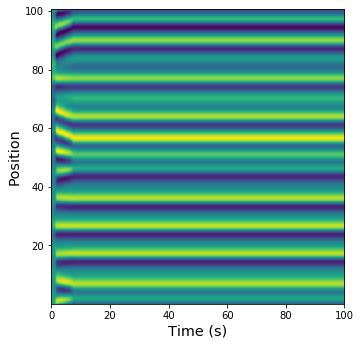

In [28]:
fig = util.plot_u(test_x_list, test_t_list, test_pred_u)
fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'ks_test_pred.png', format='png', dpi=DPI)